In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_loan = pd.read_csv('loan_prediction.csv')
fraud_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
fraud_loan.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
fraud_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
fraud_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
fraud_loan.shape

(614, 13)

# Summary Statistics

In [7]:
# finding idea about object type data
print("Gender: ", fraud_loan.Gender.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Married: ", fraud_loan.Married.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Dependents: ", fraud_loan.Dependents.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Education: ", fraud_loan.Education.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Self_Employed: ", fraud_loan.Self_Employed.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Property_Area: ", fraud_loan.Property_Area.value_counts(dropna=False), sep='\n')
print("*"*50)
print("Loan_Status: ", fraud_loan.Loan_Status.value_counts(dropna=False), sep='\n')
print("*"*50)

Gender: 
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
**************************************************
Married: 
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
**************************************************
Dependents: 
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
**************************************************
Education: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
Self_Employed: 
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
**************************************************
Property_Area: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**************************************************
Loan_Status: 
Y    422
N    192
Name: Loan_Status, dtype: int64
**************************************************


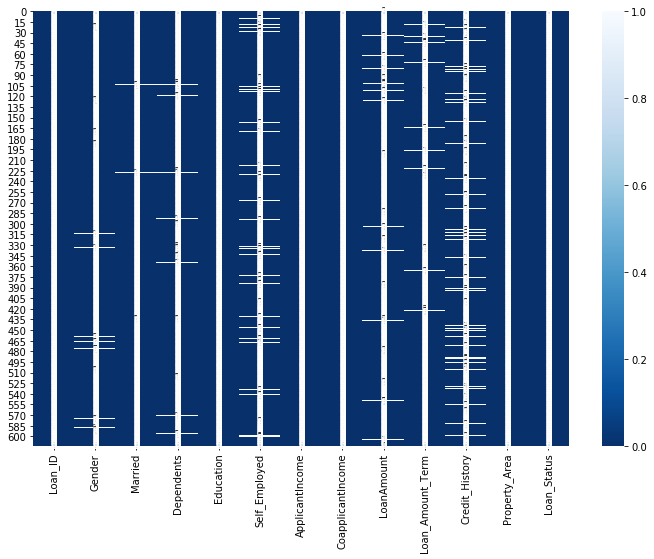

In [8]:
# We saw thare are many NaN value present in the dataset
# Finding all NaN valuess present using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(fraud_loan.isnull(),cmap="Blues_r", annot=True)
plt.show()

In [9]:
# Checking null value without visualization
fraud_loan.isnull().sum()
# Data reflects that there are many null value present we'll try to treat them

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Cleansing of Data

In [10]:
loan = fraud_loan.copy()

In [11]:
# finding mode and mean of null value columns

print("Gender_ Mode: ", loan.Gender.mode(), sep='\n')
print("*"*50)
print("Married_Mode: ", loan.Married.mode(), sep='\n')
print("*"*50)
print("Dependents_Mode: ", loan.Dependents.mode(), sep='\n')
print("*"*50)
print("Self Employed_Mode: ", loan.Self_Employed.mode(), sep='\n')
print("*"*50)
print("LoanAmount_Mean: ", loan.LoanAmount.mean(), sep='\n')
print("*"*50)
print("Loan Amount Term_Mode: ", loan.Loan_Amount_Term.mode(), sep='\n')
print("*"*50)
print("Credit History_Mode: ", loan.Credit_History.mode(), sep='\n')
print("*"*50)

Gender_ Mode: 
0    Male
dtype: object
**************************************************
Married_Mode: 
0    Yes
dtype: object
**************************************************
Dependents_Mode: 
0    0
dtype: object
**************************************************
Self Employed_Mode: 
0    No
dtype: object
**************************************************
LoanAmount_Mean: 
146.41216216216216
**************************************************
Loan Amount Term_Mode: 
0    360.0
dtype: float64
**************************************************
Credit History_Mode: 
0    1.0
dtype: float64
**************************************************


In [12]:
# Filling null value in dataset using fillna
loan = loan.fillna({'Gender': 'Male'})
loan = loan.fillna({'Married': 'Yes'})
loan = loan.fillna({'Dependents': '0'})
loan = loan.fillna({'Self_Employed': 'No'})
loan = loan.fillna({'LoanAmount': 146})
loan = loan.fillna({'Loan_Amount_Term': 360})
loan = loan.fillna({'Credit_History': 1})

In [13]:
# Dropping Loan_ID column as only got unique nos
loan.drop(['Loan_ID'], inplace=True, axis=1)

In [14]:
df_loan =loan.copy()
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
# checking null values after imputing
df_loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df_loan["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df_loan['Dependents']=df_loan["Dependents"].replace({"3+":'3'})

In [18]:
# importing label encoder to convert object dtype to int dtype
from sklearn import preprocessing
lebel_encoder = preprocessing.LabelEncoder()

df_loan['Gender'] = lebel_encoder.fit_transform(df_loan['Gender'])
df_loan['Married'] = lebel_encoder.fit_transform(df_loan['Married'])
df_loan['Education'] = lebel_encoder.fit_transform(df_loan['Education'])
df_loan['Self_Employed'] = lebel_encoder.fit_transform(df_loan['Self_Employed'])
df_loan['Property_Area'] = lebel_encoder.fit_transform(df_loan['Property_Area'])
df_loan['Dependents'] = lebel_encoder.fit_transform(df_loan['Dependents'])

In [19]:
df_loan.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
# Converting data type of target column i.e loan status
df_loan['Loan_Status']=df_loan["Loan_Status"].replace ({"Y": 1, "N":0})

In [21]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [22]:
df_loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.397394,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037503,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6308633C8>,
      dtype=object)

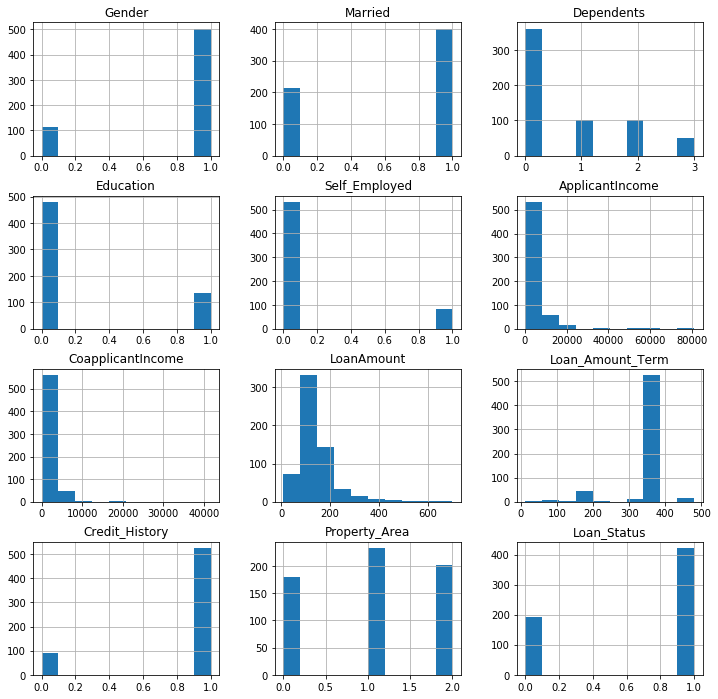

In [23]:
df_loan.hist(figsize=(12,12))

<Figure size 864x576 with 0 Axes>

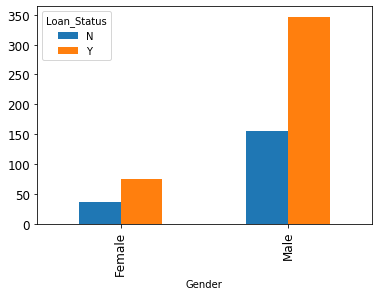

In [24]:
# relationship of Gender with loan status
plt.figure(figsize=(12,8))
loan.groupby(['Loan_Status','Gender']).size().unstack("Loan_Status").plot(kind="bar",fontsize=12)
# we see that loan is granted to both the gender and male got the max no of approved laon

<Figure size 864x576 with 0 Axes>

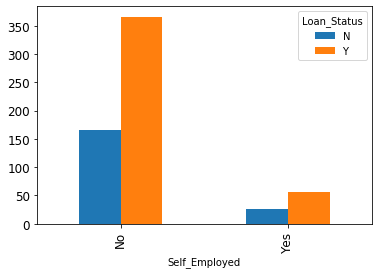

In [25]:
# relationship of Self_Employed with loan status
plt.figure(figsize=(12,8))
loan.groupby(['Loan_Status','Self_Employed']).size().unstack("Loan_Status").plot(kind="bar",fontsize=12)
# we see that loan is granted mostly who are not Self_Employed

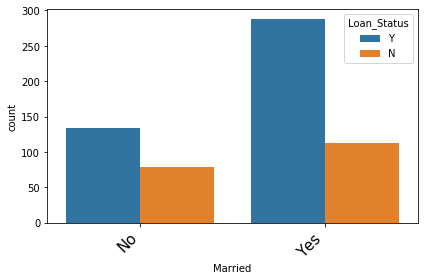

In [26]:
# Well try to find the relation between Married and Loan_Status
chart = sns.countplot(loan['Married'], hue=loan['Loan_Status'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,fontsize=15, ha="right")
plt.tight_layout()
# we see that married people get their loan approved more than no married

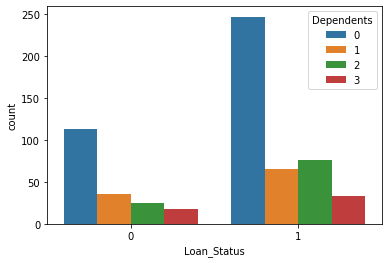

In [27]:
# Trying to dipict the rerlationship between Loan_Status and Dependents

chart = sns.countplot(df_loan['Loan_Status'], hue=df_loan['Dependents'])
# we see that people with 0 dependents gets maximum no of loans
# people with 3+ dependents gets maimum no of loans

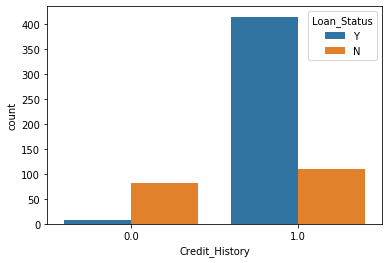

In [28]:
chart = sns.countplot(loan['Credit_History'], hue=loan['Loan_Status'])
# we see that people with good credit history gets maximum no of loans

<Figure size 864x576 with 0 Axes>

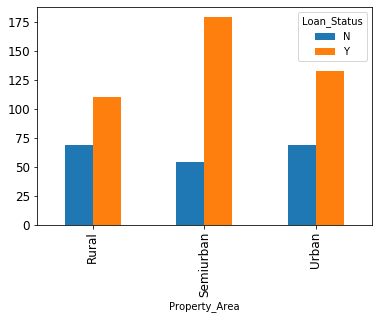

In [29]:
# relationship of Property_Area with loan status
plt.figure(figsize=(12,8))
loan.groupby(['Loan_Status','Property_Area']).size().unstack("Loan_Status").plot(kind="bar",fontsize=12)
# we see that semiurban is granted highest loan followed by urban and then rural

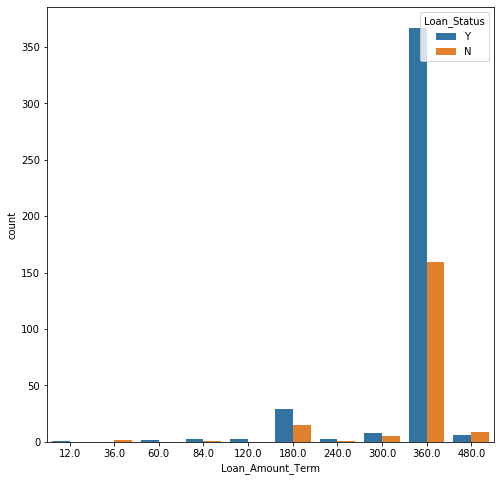

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(loan['Loan_Amount_Term'], hue=loan['Loan_Status'])
# maximum number of loan granted is for 360 term followed by 180

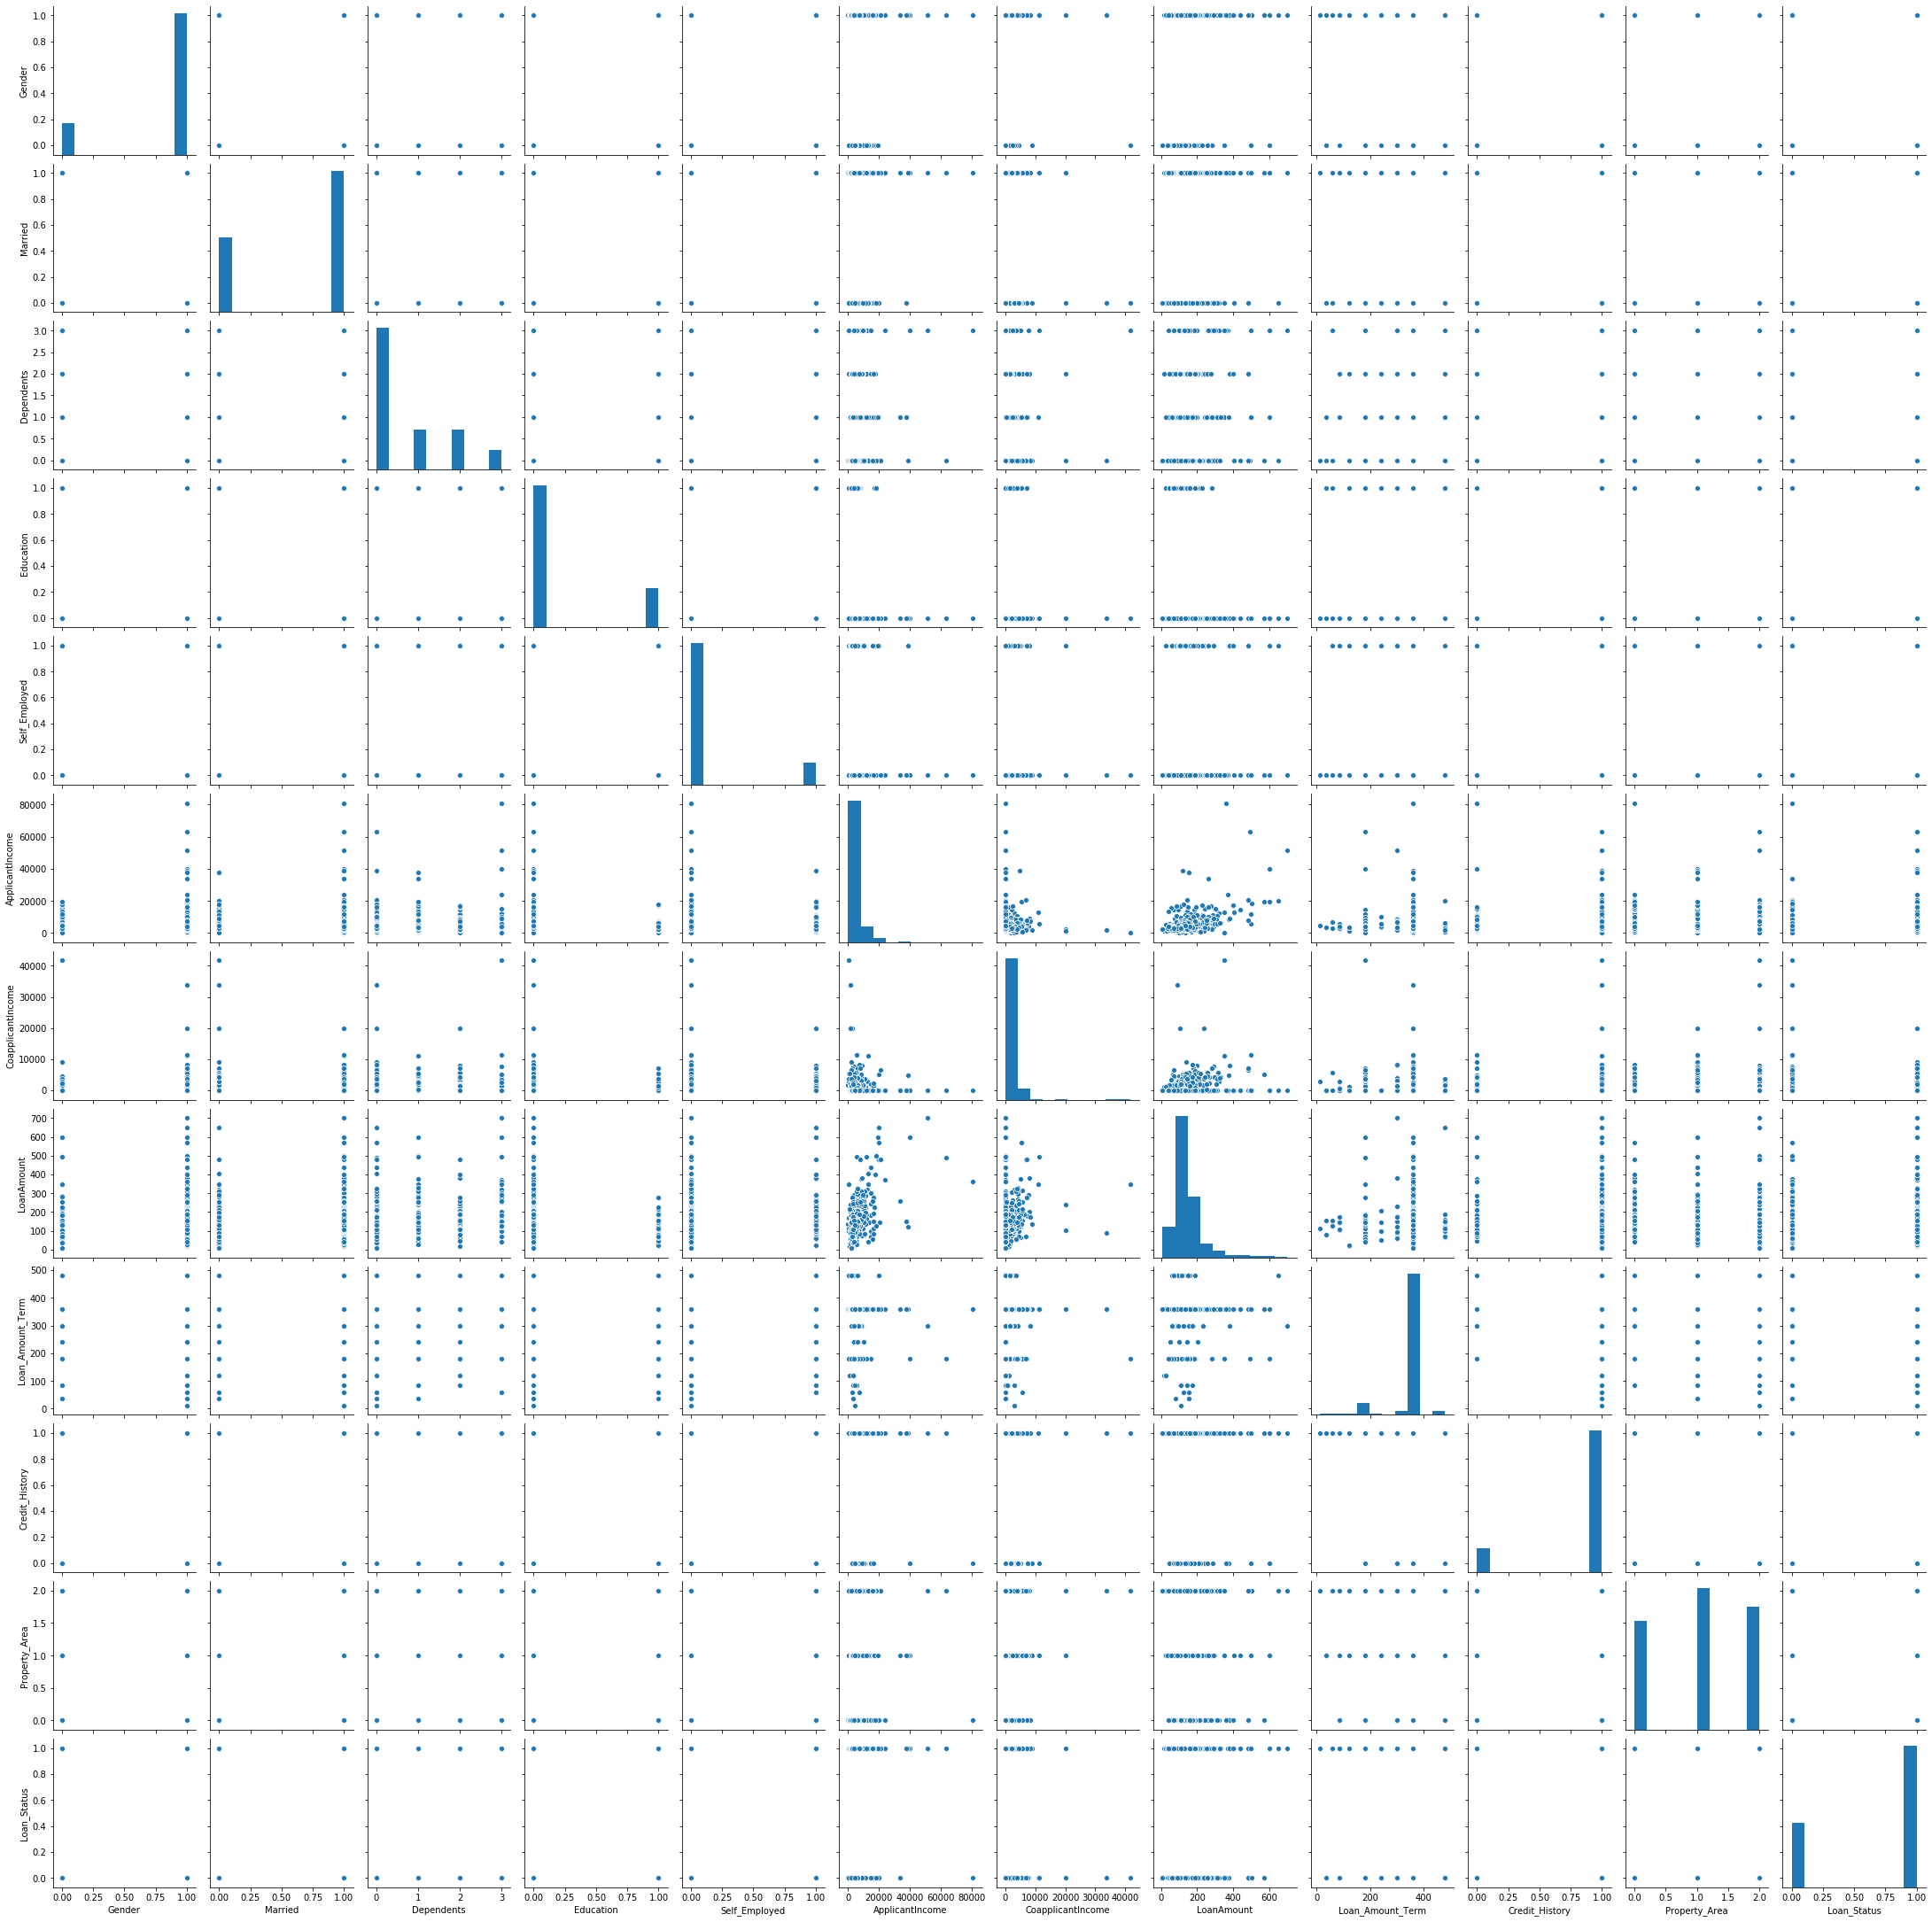

In [31]:
# bivirate analysis
sns.pairplot(df_loan)

# Checking Correlation

In [32]:
dfcor=df_loan.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107909,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147131,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163108,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.167041,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115259,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565621,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187863,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107909,0.147131,0.163108,-0.167041,0.115259,0.565621,0.187863,1.000000,0.036486,-0.001412,-0.044818,-0.036345
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036486,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001412,-0.004705,1.000000,0.001963,0.540556


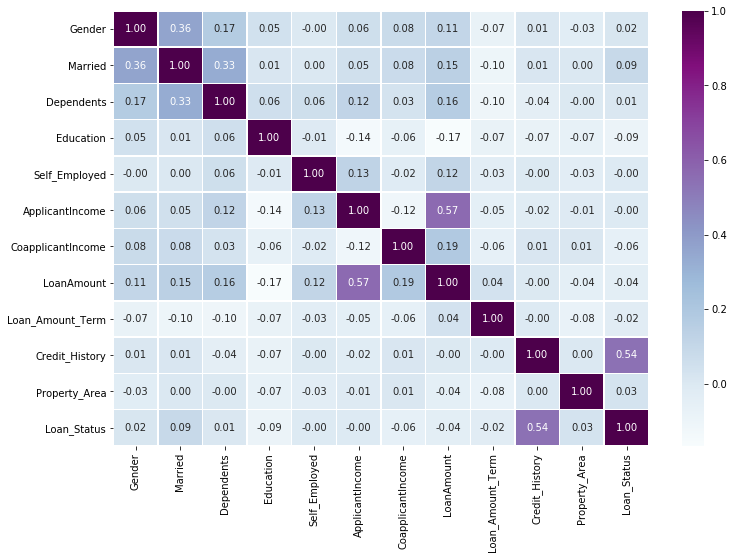

In [33]:
# visual representation of correlation in heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='BuPu',annot=True, fmt="0.2f", linewidths=0.5)

# Plotting Outliers

In [34]:
df_loan.shape

(614, 12)

In [35]:
collist = df_loan.columns.values
ncol = 12
nrows =10

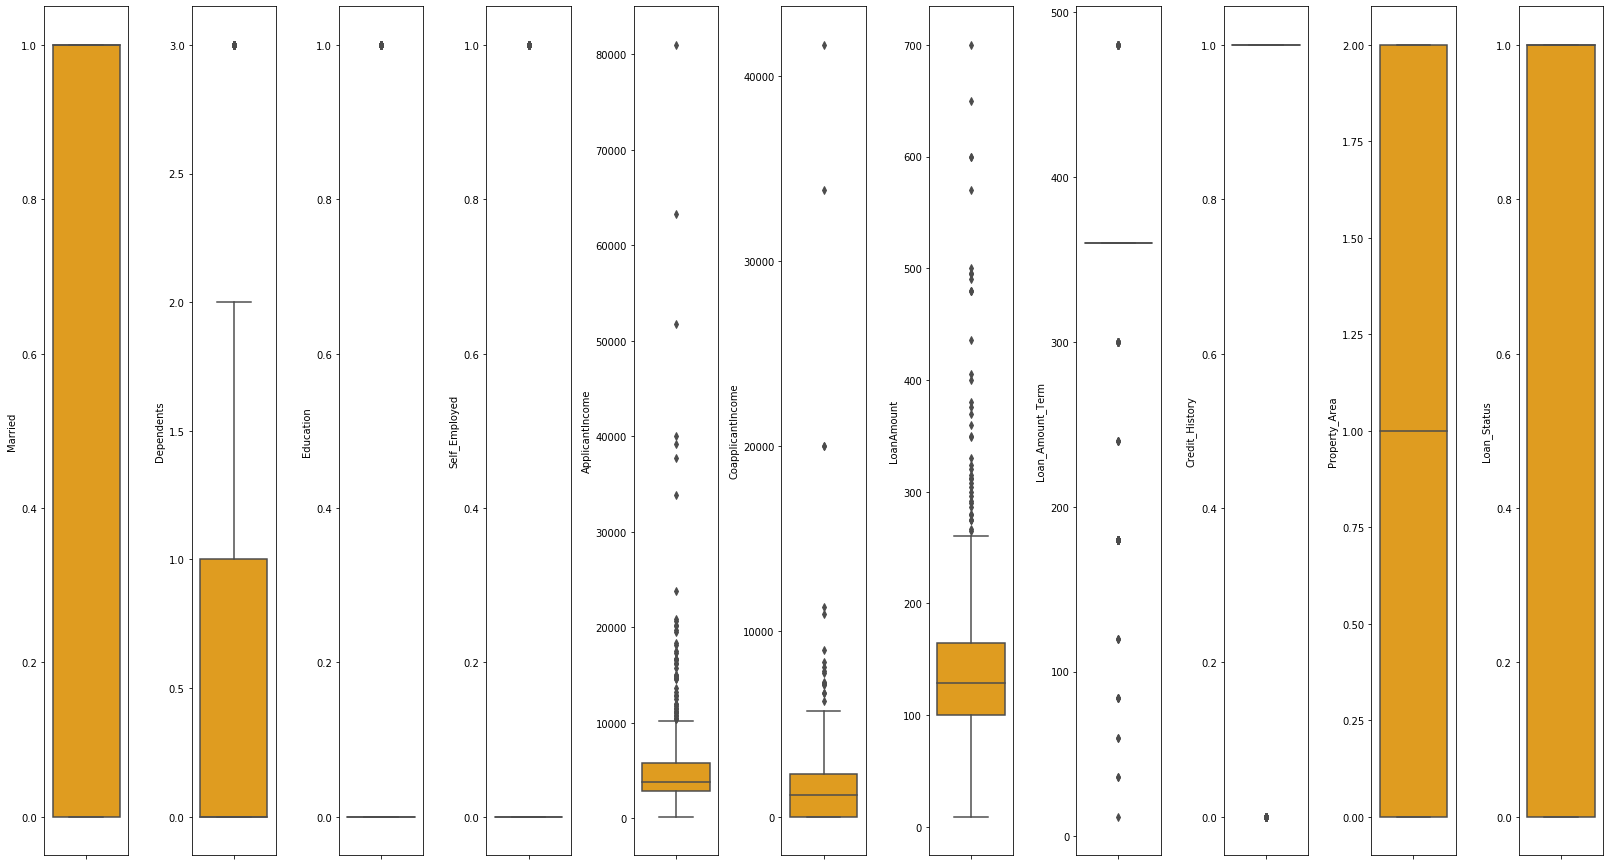

In [36]:
plt.figure (figsize=(2*ncol,10*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_loan[collist[i]],orient='v',color='orange')
    plt.tight_layout()

In [37]:
# finding if there ia any outlier present 
# importing libraries

from scipy.stats import zscore
z_score=abs(zscore(df_loan))
print(df_loan.shape)
df_loan = df_loan.loc[(z_score<3).all(axis=1)]
print(df_loan.shape)
#Outliers have been removed and the new shape of the dataset reflects below

(614, 12)
(577, 12)


# Checking Skewness

In [38]:
df_loan.skew()
# very high positive skew present in dataset

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.114116
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

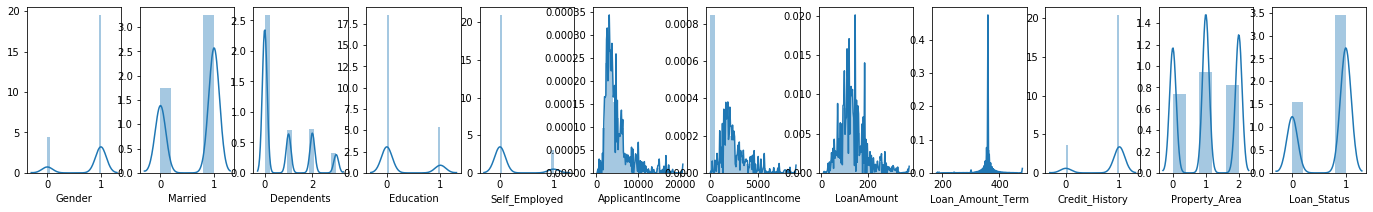

In [39]:
plt.figure(figsize=(24,36))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_loan[collist[i]],kde_kws={'bw':0.1})

In [40]:
# treating skewness with log
import numpy as np
for col in df_loan.columns:
    if df_loan.skew().loc[col]>0.55:
        df_loan[col] = np.log1p(df_loan[col])

df_loan.skew()
# skewness still presense

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697421
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [41]:
# treating with square root
list = ['Education','Self_Employed']
for i in list:
    df_loan[i]=np.sqrt(df_loan[i])

df_loan.skew()
# skewness still reflecting

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697421
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [42]:
# treating with cube root
list = ['Education','Self_Employed']
for i in list:
    df_loan[i]=np.cbrt(df_loan[i])

df_loan.skew()
# skewness still present, we'll go forward with the same data

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697421
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Seperating input and output for classification

In [43]:
df_loan.shape

(577, 12)

In [44]:
# defining x features
x = df_loan.iloc[:,0:-1]
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.0,0.0,8.674197,0.000000,4.990433,360.0,1.0,2
1,1,1,0.693147,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0


In [45]:
# defining y variable
y = df_loan.iloc[:,-1]
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int64

In [46]:
x.shape

(577, 11)

In [47]:
y.shape

(577,)

In [48]:
# Scaling down using standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.77514304, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23085296,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.77514304, ...,  0.23085296,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.57375944, ...,  0.23085296,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36281681, ...,  0.23085296,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.77514304, ...,  0.23085296,
        -2.38941464, -0.03952504]])

# Data ready for ML

In [49]:
# importing important libraries

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# finding best random state between 42 tpo 100 with test size 0.22

max_acc_score=0
for i in range(42,101):
    r_state=i
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state,test_size=0.22)
    lgr = LogisticRegression()
    lgr.fit(x_train,y_train)
    y_predict = lgr.predict(x_test)
    acc_score = accuracy_score(y_test, y_predict)
    print("Accuracy score corresponding to random state: ", i, "is: ",acc_score)
    if acc_score > max_acc_score:
        max_acc_score = acc_score
        final_r_state = r_state
    print()
    print()
    print("Maximum accuracy score corresponding to", final_r_state,"is",max_acc_score)

Accuracy score corresponding to random state:  42 is:  0.8267716535433071


Maximum accuracy score corresponding to 42 is 0.8267716535433071
Accuracy score corresponding to random state:  43 is:  0.7952755905511811


Maximum accuracy score corresponding to 42 is 0.8267716535433071
Accuracy score corresponding to random state:  44 is:  0.8188976377952756


Maximum accuracy score corresponding to 42 is 0.8267716535433071
Accuracy score corresponding to random state:  45 is:  0.8031496062992126


Maximum accuracy score corresponding to 42 is 0.8267716535433071
Accuracy score corresponding to random state:  46 is:  0.8346456692913385


Maximum accuracy score corresponding to 46 is 0.8346456692913385
Accuracy score corresponding to random state:  47 is:  0.8031496062992126


Maximum accuracy score corresponding to 46 is 0.8346456692913385
Accuracy score corresponding to random state:  48 is:  0.8110236220472441


Maximum accuracy score corresponding to 46 is 0.8346456692913385
Accuracy scor

In [51]:
# Since the maximum accuracy score is coming around 0.8897 with random state 84.
# However checking with other models to see if we get any better score 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=84,test_size=0.22)

In [52]:
x_train.shape

(450, 11)

In [53]:
y_train.shape

(450,)

In [54]:
x_test.shape

(127, 11)

In [55]:
y_test.shape

(127,)

In [56]:
# finding best parameters for LogisticRegression using GridSearchCV
lgr = LogisticRegression()
parameters={'penalty':['l1','l2']}
lgrgs=GridSearchCV(lgr,parameters,cv=5)
lgrgs.fit(x_train,y_train)
lgrgs.best_params_

{'penalty': 'l2'}

In [57]:
# finding best performance for Support Vector Classification using GridSearchCV
svc = SVC()
parameters = {'kernel':('linear','poly','rbf'), 'C':[1,10]}
svcgs=GridSearchCV(svc,parameters,cv=5)
svcgs.fit(x_train,y_train)
svcgs.best_params_

{'C': 1, 'kernel': 'linear'}

In [58]:
# finding best performance for KNeighborsClassifier using GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':range(1,30)}
knngs=GridSearchCV(knn,parameters,cv=5)
knngs.fit(x_train,y_train)
knngs.best_params_

{'n_neighbors': 12}

In [59]:
# finding best performance for RandomForestClassifier using GridSearchCV
rfc = RandomForestClassifier()
parameters = {'n_estimators':[50,100,150,200,250,300]}
rfcgs=GridSearchCV(rfc,parameters,cv=5)
rfcgs.fit(x_train,y_train)
rfcgs.best_params_

{'n_estimators': 250}

In [60]:
# finding best performance for DecisionTreeClassifier using GridSearchCV
dtc = DecisionTreeClassifier()
parameters = {'criterion':('gini','entropy')}
dtcgs=GridSearchCV(dtc,parameters,cv=5)
dtcgs.fit(x_train,y_train)
dtcgs.best_params_

{'criterion': 'entropy'}

In [61]:
# finding best performance for RidgeClassifier using GridSearchCV
rc = RidgeClassifier()
parameters ={'alpha':[0.001,0.01,0.1,1]}
rcgs=GridSearchCV(rc, parameters, cv=5)
rcgs.fit(x_train,y_train)
rcgs.best_params_

{'alpha': 0.001}

In [62]:
# finding best performance for GradientBoostingClassifier using GridSearchCV
gbc = GradientBoostingClassifier()
parameters ={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbcgs=GridSearchCV(gbc, parameters, cv=5)
gbcgs.fit(x_train,y_train)
gbcgs.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [71]:
lgr = LogisticRegression(penalty='l2')
svc = SVC(C=1,kernel='linear')
knn = KNeighborsClassifier(n_neighbors=12)
rfc = RandomForestClassifier(n_estimators=2500)
dtc = DecisionTreeClassifier(criterion='entropy')
rc = RidgeClassifier(alpha=0.001)
gbc = GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
gnb = GaussianNB()

In [72]:
models =[]
models.append(('LogisticRegression', lgr))
models.append(('SVC', svc))
models.append(('KNeighborsClassifier', knn))
models.append(('RandomForestClassifier', rfc))
models.append(('DecisionTreeClassifier', dtc))
models.append(('RidgeClassifier', rc))
models.append(('GradientBoostingClassifier', gbc))
models.append(('GaussianNB', gnb))

****************************** LogisticRegression ******************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score = 0.889763779527559


Cross_val_score = 0.8180809595202397


Classification_report
               precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.88      1.00      0.93        98

    accuracy                           0.89       127
   macro avg       0.94      0.76      0.81       127
weighted avg       0.90      0.89      0.88       127



roc_auc_score = 0.7586206896551724


[[15 14]
 [ 0 98]]


AxesSubplot(0.125,0.71587;0.281818x0.16413)
****************************** SVC ************************

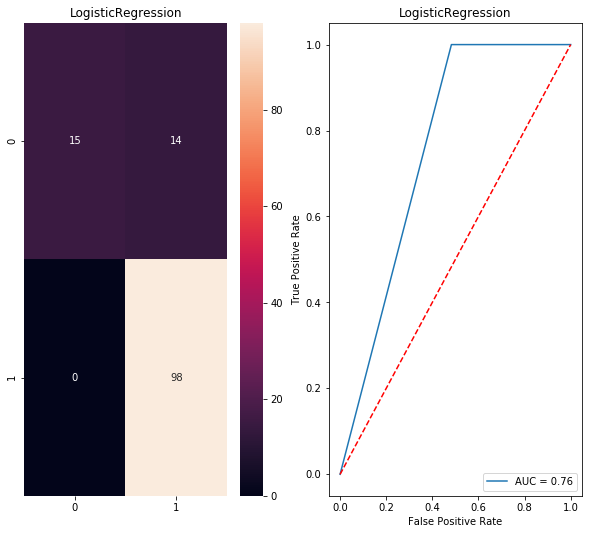

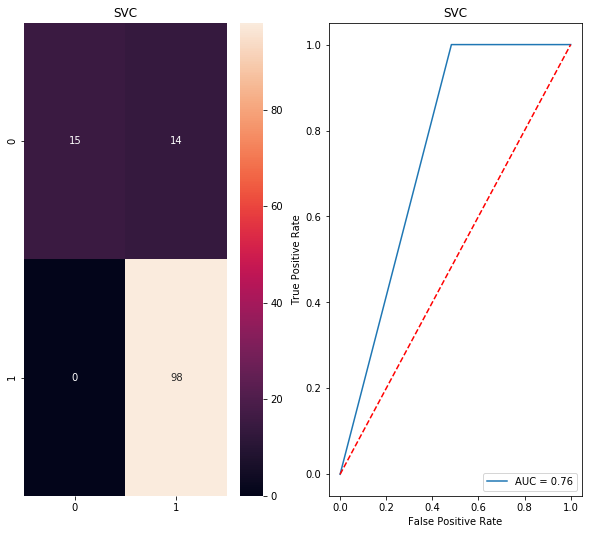

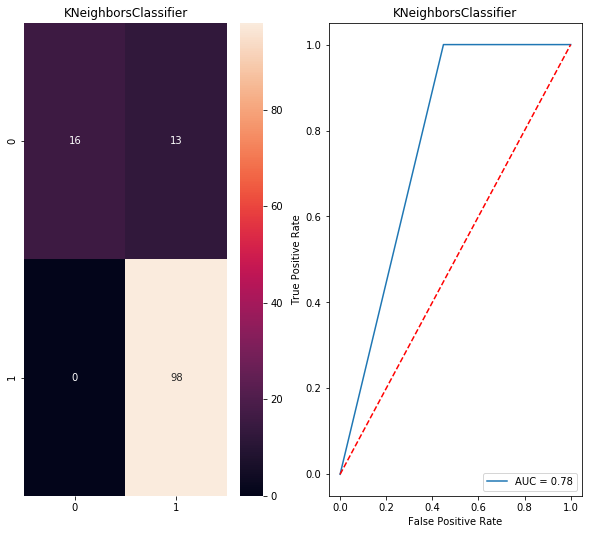

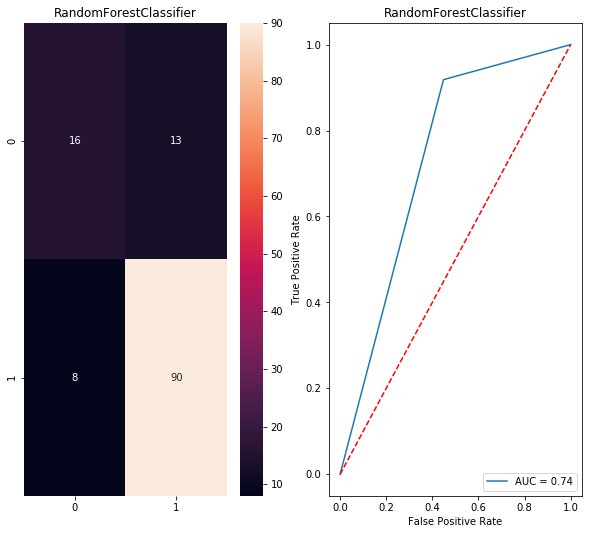

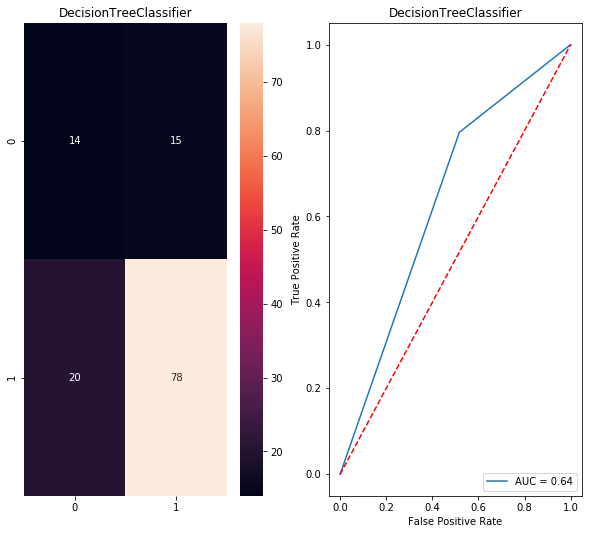

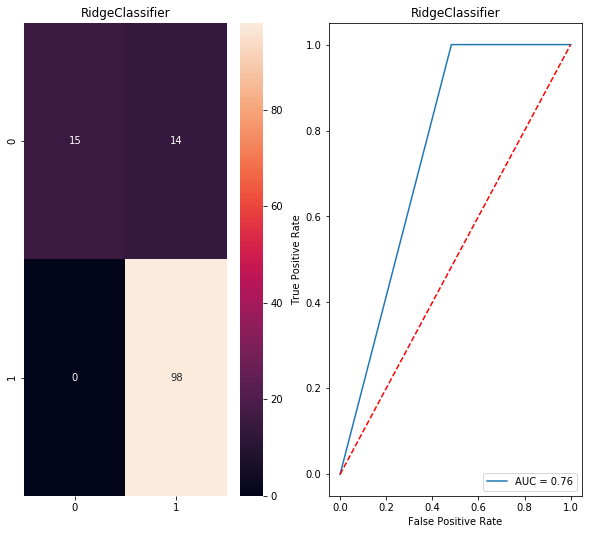

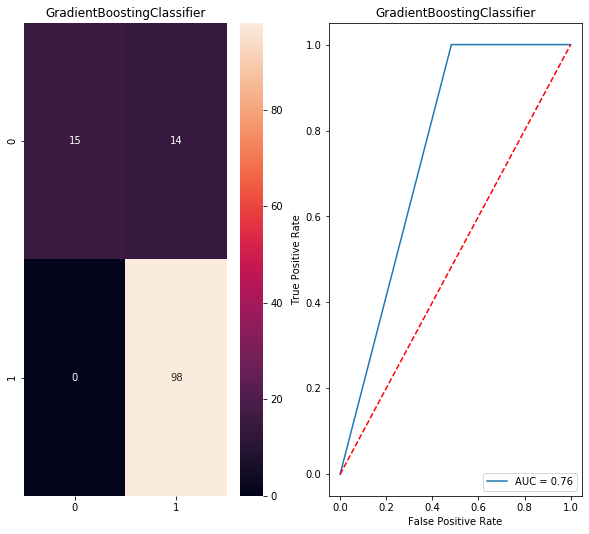

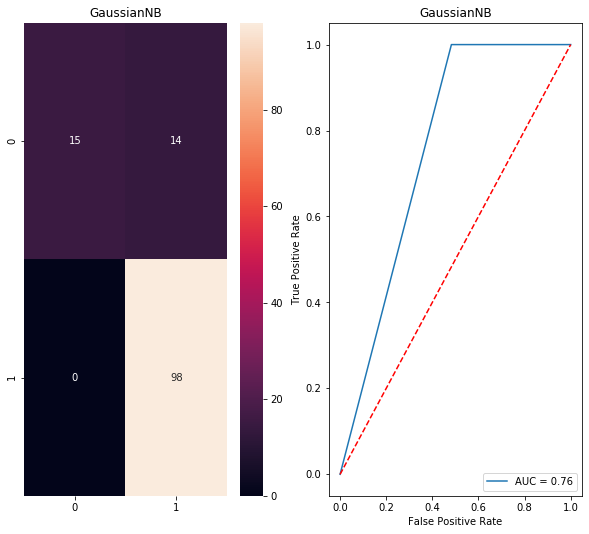

In [73]:
# Testing all required models with best parameters calculated

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("*"*30,name,"*"*30)
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_predict=model.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,y_predict)
    print("Accuracy Score =", acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(model, x, y, cv=5, scoring="accuracy").mean()
    print("Cross_val_score =", cv_score)
    cvs.append(cv_score*100)
    print("\n")
    print('Classification_report\n', classification_report(y_test, y_predict))
    print("\n")
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test, y_predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score =', roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(421)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(422)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [74]:
import pandas as pd
result=pd.DataFrame({'Model': Model, 'Accuracy Score': score, 'Cross_val_score': cvs, 'roc_auc_curve': rocscore})
result

,Model,Accuracy Score,Cross_val_score,roc_auc_curve
0,LogisticRegression,88.976378,81.808096,75.862069
1,SVC,88.976378,81.808096,75.862069
2,KNeighborsClassifier,89.763780,80.593703,77.586207
3,RandomForestClassifier,83.464567,79.553223,73.504574
4,DecisionTreeClassifier,72.440945,71.752624,63.933849
5,RidgeClassifier,88.976378,81.808096,75.862069
6,GradientBoostingClassifier,88.976378,80.770615,75.862069
7,GaussianNB,88.976378,81.286357,75.862069


In [75]:
# The above result shows that KNeighborsClassifier got better result than other model

In [76]:
from sklearn.externals import joblib
joblib.dump(knn,'Fraud_Loan_Prediction.obj')

['Fraud_Loan_Prediction.obj']

In [77]:
model=joblib.load('Fraud_Loan_Prediction.obj')

In [78]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)